In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19540\2416981832.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19540\2416981832.py:2: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('test.csv')


In [3]:
print('Shape:',train.shape)
print('Columns:',train.columns.tolist())
train.head()

Shape: (33538, 65)
Columns: ['id', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_id', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'country_code', 'country', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'rev

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,22267382,Modern and Cozy Large Studio in Brooklyn,Modern large studio with new amenities and app...,Our place is a little quiet sanctuary in the h...,Modern large studio with new amenities and app...,none,"BAM, Barclays, Brooklyn City Point, Fort Green...",NaN,"Subway: 2,3,4,5,A,C,B,Q,G",Washer/Dryer Dishwasher Internet Gym Roof Top ...,...,10.0,10.0,10.0,t,f,flexible,f,f,1,0.59
1,2473861,Royal Harlem TRIPLEX Home 5 Beds,Harlem is back and so gorgeous! Visit and expl...,Harlem is back and so gorgeous! Visit and expl...,Harlem is back and so gorgeous! Visit and expl...,none,HARLEM is a piece of real NY history overflowi...,HARLEM RESTAURANTS Red Rooster Harlem -- excel...,PUBLIC TRANSPORTATION: Conveniently near all p...,The WHOLE ENTIRE HOUSE,...,9.0,9.0,9.0,t,f,moderate,f,f,3,2.47
2,25079703,Sunny East Village Studio,"Clean, hip and well designed sun drenched East...",This is a rare East Village studio with it's h...,"Clean, hip and well designed sun drenched East...",none,East Village is one of the last remaining neig...,NaN,NaN,You'll have access to the entire space - it's ...,...,10.0,10.0,10.0,f,f,moderate,f,f,1,0.89
3,9342478,"Beautiful, airy, light-filled room","Private, spacious, comfortable room in 2-bed f...","Big closet, two big windows, tall ceiling and ...","Private, spacious, comfortable room in 2-bed f...",none,One block from Morgan L stop. Super cool area....,NaN,NaN,NaN,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
4,4866426,Private Room in Prime Brooklyn Spot,"Comfy, quiet and big private room in a three b...",This big old apartment that we love and take c...,"Comfy, quiet and big private room in a three b...",none,I absolutely love this neighborhood - right at...,Just a note about the space: The window in you...,Super convenient to almost all subway lines. A...,Your room has a very comfortable queen sized b...,...,10.0,10.0,10.0,f,f,flexible,f,f,1,3.14


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33538 entries, 0 to 33537
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                33538 non-null  int64  
 1   name                              33526 non-null  object 
 2   summary                           32266 non-null  object 
 3   space                             23038 non-null  object 
 4   description                       33230 non-null  object 
 5   experiences_offered               33538 non-null  object 
 6   neighborhood_overview             19948 non-null  object 
 7   notes                             13447 non-null  object 
 8   transit                           20796 non-null  object 
 9   access                            19304 non-null  object 
 10  interaction                       18670 non-null  object 
 11  house_rules                       19983 non-null  object 
 12  host

In [5]:
train = train.drop(train[(train['accommodates']<3) &
                                        (train['price']>1600)].index)

train = train.drop(train[(train['beds']>13) &
                                        (train['price']<1200)].index)

train = train.drop(train[(train['bedrooms']>7.5) &
                                        (train['price']<1200)].index)

train = train.drop(train[(train['square_feet']>2200) &
                                        (train['price']<1000)].index)

train = train.drop(train[(train['guests_included']>12) &
                                        (train['price']<1000)].index)

train = train.drop(train[(train['bathrooms']>10) &
                                        (train['price']<1000)].index)

train = train.drop(train[(train['review_scores_location']<3) &
                                        (train['price']>300)].index)

train = train.drop(train[(train['calculated_host_listings_count']>100) &
                                        (train['price']>1000)].index)
train = train.drop(train[(train['review_scores_cleanliness']<9) &
                                        (train['price']>1500)].index)
train = train.drop(train[(train['review_scores_rating']<40) &
                                        (train['price']>500)].index)
train = train.drop(train[(train['number_of_reviews']>3500) &
                                        (train['price']>300)].index)
train = train.drop(train[(train['review_scores_value']<2.5) &
                                        (train['price']>500)].index)
train = train.drop(train[(train['minimum_nights']>700) &
                                        (train['price']>100)].index)

In [6]:
missing_train = train.isnull().sum().sort_values(ascending=False)
missing_train.head(40)

host_acceptance_rate           33499
square_feet                    33162
notes                          20066
host_response_rate             16178
host_response_time             16178
interaction                    14852
access                         14219
neighborhood_overview          13575
house_rules                    13544
host_about                     13151
transit                        12724
space                          10487
review_scores_value             7700
review_scores_checkin           7698
review_scores_location          7697
review_scores_accuracy          7683
review_scores_communication     7678
review_scores_cleanliness       7668
review_scores_rating            7653
reviews_per_month               6936
first_review                    6936
last_review                     6934
host_neighbourhood              4699
summary                         1269
zipcode                          484
description                      308
host_location                    114
m

In [7]:
full=pd.concat([train,test], ignore_index=True)
full.columns.tolist()

['id',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'host_id',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'country_code',
 'country',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'r

In [8]:
full.drop(['id',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'host_id',
 'host_name',
 'host_about',
 'host_acceptance_rate',
 'host_neighbourhood',
 'square_feet'],axis=1, inplace=True)
full.shape

(50836, 47)

In [9]:
cols1 = ["host_since","first_review","last_review","host_response_time","host_location","market","city","state","host_is_superhost","host_has_profile_pic","host_identity_verified"]
for col in cols1:
    full[col].fillna("None", inplace=True)

In [10]:
cols = ["review_scores_value","review_scores_checkin","review_scores_location","review_scores_accuracy","review_scores_communication","review_scores_cleanliness","review_scores_rating","reviews_per_month","zipcode","bathrooms","bedrooms","bedrooms","beds","host_listings_count"]
for col in cols:
    full[col].fillna(0, inplace=True)

In [11]:
cols = ["host_since","first_review","last_review"]
for col in cols:
    full[col].fillna(full[col].mode()[0], inplace=True)
full['price'] = full['price'].fillna(full['price'].mean())
full['host_response_rate'] = full['host_response_rate'].str.strip('%').astype(float)

median_response_rate = full['host_response_rate'].median()
full['host_response_rate'].fillna(median_response_rate, inplace=True)
full['host_response_rate'] = full['host_response_rate'].astype(str) + '%'
full['host_response_rate']

0        100.0%
1        100.0%
2        100.0%
3        100.0%
4        100.0%
          ...  
50831    100.0%
50832    100.0%
50833     96.0%
50834    100.0%
50835    100.0%
Name: host_response_rate, Length: 50836, dtype: object

In [12]:
full.isnull().sum()[full.isnull().sum()>0]

Series([], dtype: int64)

In [13]:
full.columns.tolist()

['host_since',
 'host_location',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'country_code',
 'country',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'is_business_travel_ready',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count',
 'reviews_per_month']

In [14]:
full['host_location'].value_counts()

New York, New York, United States         34786
US                                         5877
Brooklyn, New York, United States          2962
Queens, New York, United States             979
Los Angeles, California, United States      297
                                          ...  
Ferrol, Galicia, Spain                        1
Rahway, New Jersey, United States             1
Berlin, Massachusetts, United States          1
Kochi, Kerala, India                          1
Zapopan, Jalisco, Mexico                      1
Name: host_location, Length: 1568, dtype: int64

In [15]:
full['host_response_time'].value_counts()

None                  24440
within an hour        15671
within a few hours     5615
within a day           4279
a few days or more      831
Name: host_response_time, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19540\3586389968.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(full['host_response_rate'].str.strip('%').astype(float))


<Axes: xlabel='host_response_rate', ylabel='Density'>

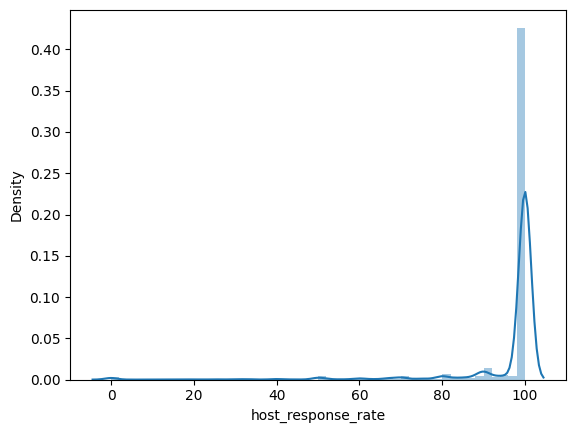

In [16]:
full['host_response_rate'].value_counts()
sns.distplot(full['host_response_rate'].str.strip('%').astype(float))

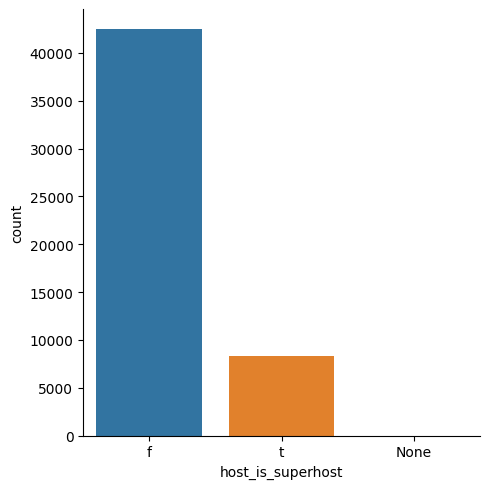

In [17]:
full['host_is_superhost'].value_counts()
sns.catplot(x='host_is_superhost',  kind='count', data=full)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19540\1339090567.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(full['reviews_per_month'],rug=True,kde=False,ax=ax[0])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19540\1339090567.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(full

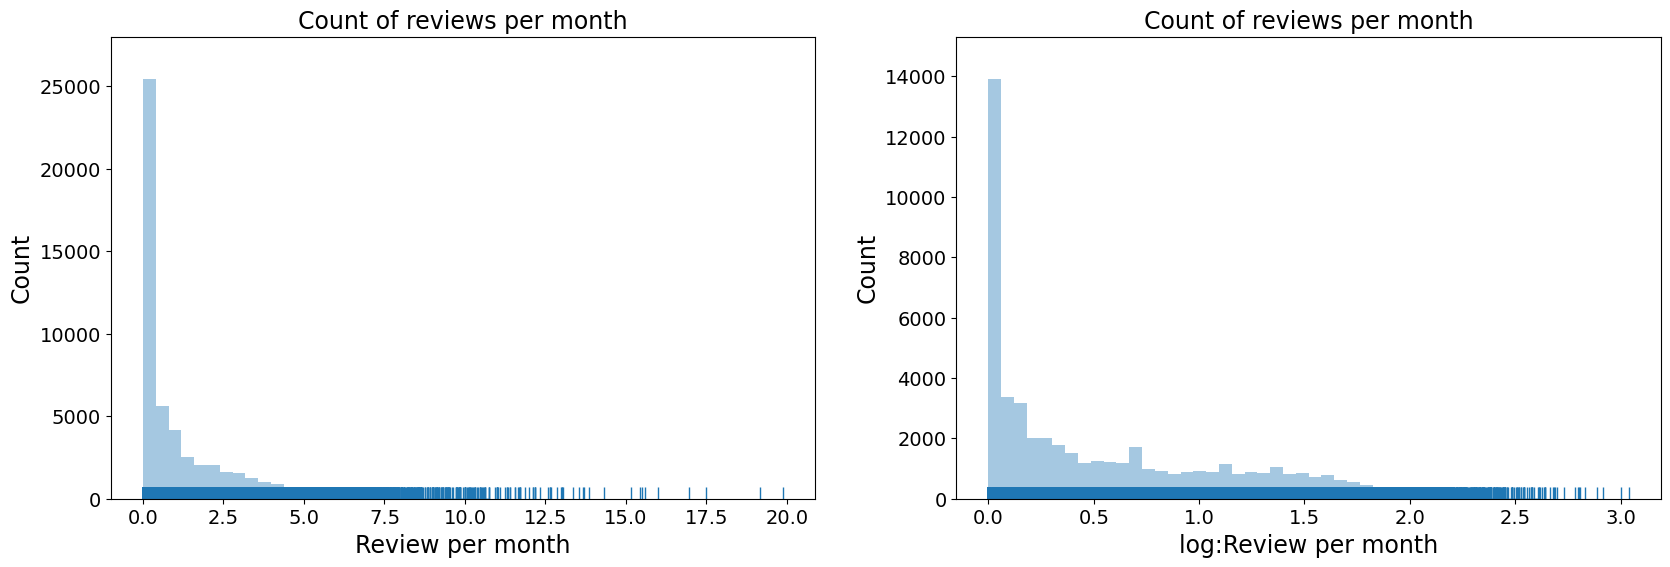

In [18]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.distplot(full['reviews_per_month'],rug=True,kde=False,ax=ax[0])
ax[0].set_title('Count of reviews per month',fontsize=17)
ax[0].set_ylabel('Count',fontsize=17)
ax[0].set_xlabel('Review per month',fontsize=17)
ax[0].tick_params(labelsize=14)

sns.distplot(np.log1p(full['reviews_per_month']),rug=True,kde=False,ax=ax[1])
ax[1].set_title('log :Count of review per month')
ax[1].set_title('Count of reviews per month',fontsize=17)
ax[1].set_ylabel('Count',fontsize=17)
ax[1].set_xlabel('log:Review per month',fontsize=17)
ax[1].tick_params(labelsize=14)

In [19]:
full['reviews_per_month'].describe(percentiles=[.25, .5, .75, .95, .99])

count    50836.000000
mean         1.134421
std          1.603665
min          0.000000
25%          0.040000
50%          0.390000
75%          1.670000
95%          4.480000
99%          6.790000
max         19.890000
Name: reviews_per_month, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19540\2377534727.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(full['price'], ax=axes[0])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19540\2377534727.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(full['price']), ax=axes[1])


<Axes: xlabel='price', ylabel='Density'>

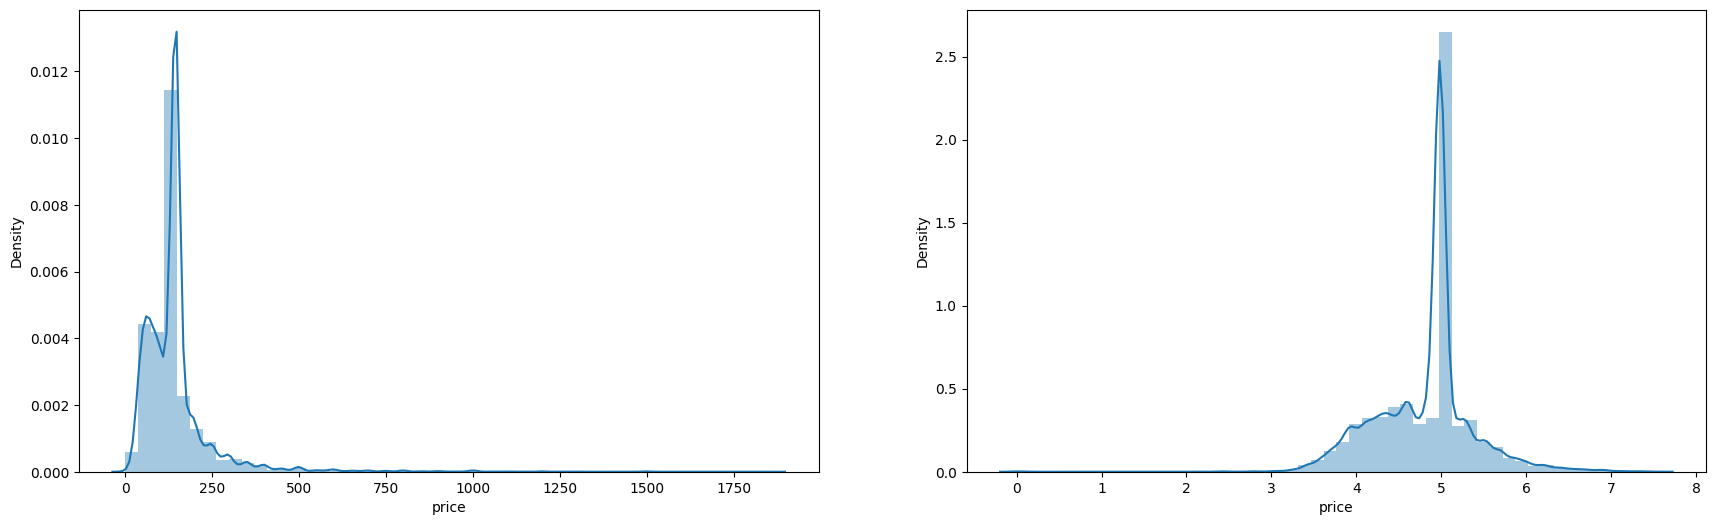

In [20]:
fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(full['price'], ax=axes[0])
sns.distplot(np.log1p(full['price']), ax=axes[1])
# full['price'] = np.log1p(full['price'])

<Axes: >

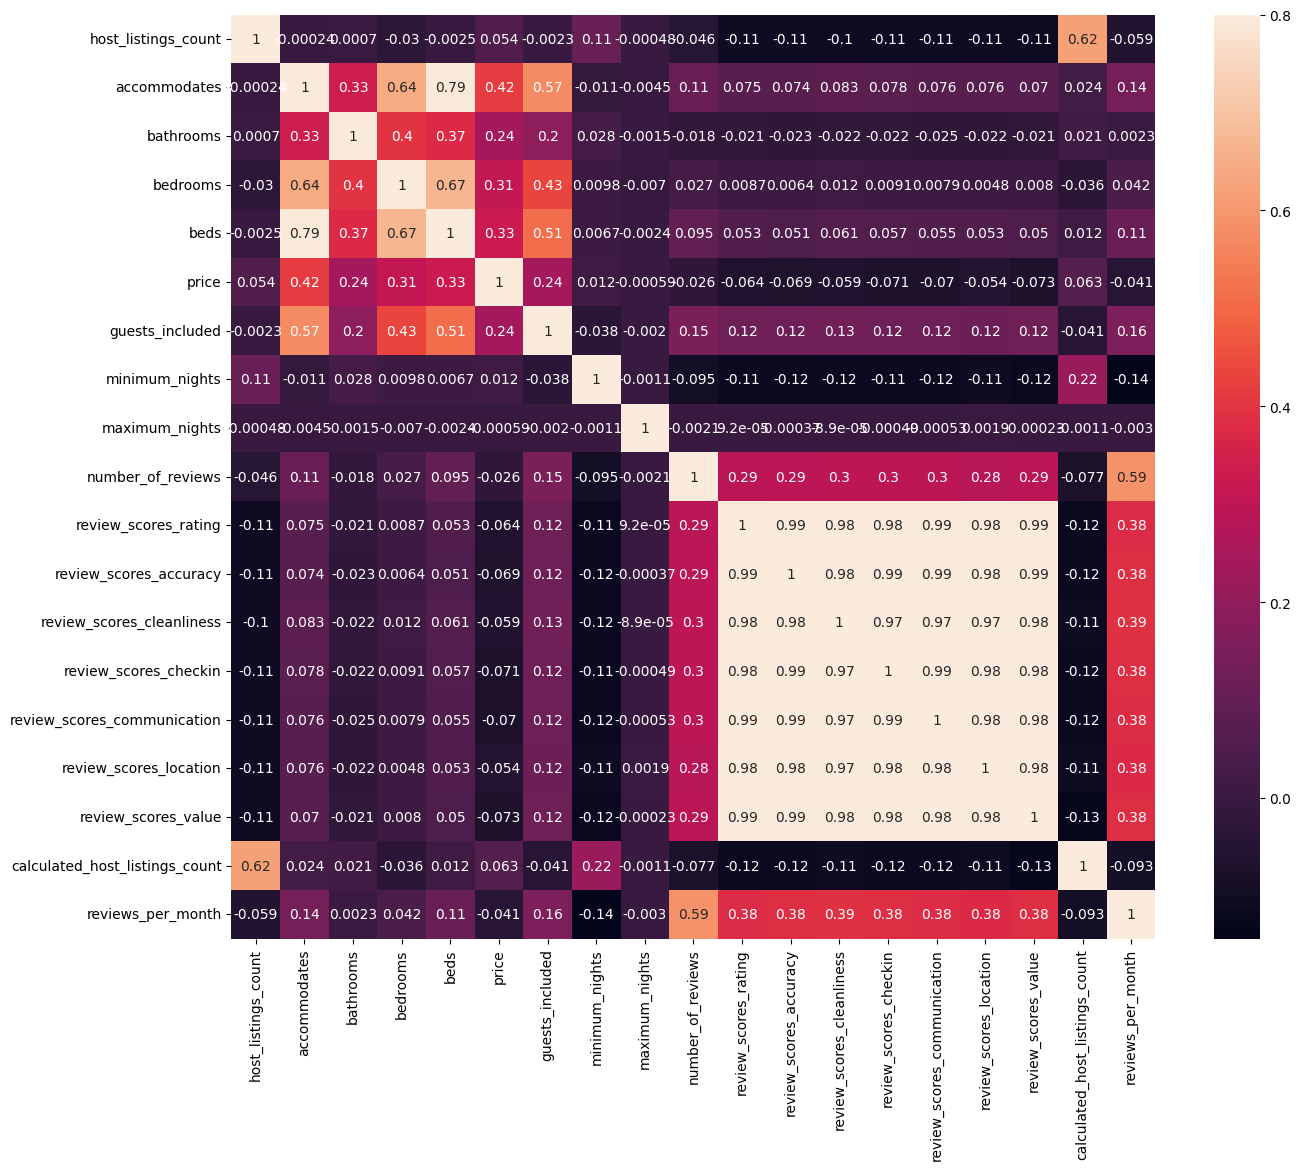

In [21]:
corrmatrix = full.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmatrix, vmax=0.8, square=True,annot=True)

In [22]:
full.drop([ 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',],axis=1, inplace=True)

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin


class labelenc(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        lab=LabelEncoder()
        X["host_since"] = lab.fit_transform(X["host_since"])
        X["first_review"] = lab.fit_transform(X["first_review"])
        X["last_review"] = lab.fit_transform(X["last_review"])
        return X

In [24]:
from scipy.stats import skew


class skew_dummies(BaseEstimator, TransformerMixin):
    def __init__(self,skew=0.5):
        self.skew = skew

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        X_numeric=X.select_dtypes(exclude=["object"])
        skewness = X_numeric.apply(lambda x: skew(x))
        skewness_features = skewness[abs(skewness) >= self.skew].index
        X[skewness_features] = np.log1p(X[skewness_features])
        X = pd.get_dummies(X)
        return X

In [25]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('labenc', labelenc()),
    ('skew_dummies', skew_dummies(skew=1)),
    ])

In [26]:
full2 = full.copy()

In [27]:
data_pipe = pipe.fit_transform(full2)

In [28]:
data_pipe.shape

(50836, 50275)

In [29]:
data_pipe.head()

,host_since,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,...,cancellation_policy_long_term,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,940,0.693147,1.098612,0.693147,0.693147,0.693147,4.983607,1.098612,2.079442,2.564949,...,0,0,0,0,0,0,1,0,1,0
1,1491,1.609438,2.197225,0.693147,1.386294,1.791759,5.170484,1.386294,1.386294,3.433987,...,0,1,0,0,0,0,1,0,1,0
2,1214,0.693147,1.098612,0.693147,0.000000,0.693147,5.198497,0.693147,1.098612,7.026427,...,0,1,0,0,0,0,1,0,1,0
3,1571,0.693147,0.693147,0.693147,0.693147,0.693147,3.761200,0.693147,1.386294,7.026427,...,0,0,0,0,0,0,1,0,1,0
4,1000,0.693147,1.098612,0.693147,0.693147,0.693147,4.394449,0.693147,0.693147,4.510860,...,0,0,0,0,0,0,1,0,1,0


In [30]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

In [31]:
n_train=train.shape[0]

X = data_pipe[:n_train]
test_X = data_pipe[n_train:]
y= train.price

X_scaled = scaler.fit(X).transform(X)
y_log = train.price
test_X_scaled = scaler.transform(test_X)

In [ ]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=0.001)
lasso.fit(X_scaled,y_log)
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=data_pipe.columns)
FI_lasso.sort_values("Feature Importance",ascending=False)

In [ ]:
full_pipe = pipe.fit_transform(full)
full_pipe.shape

In [ ]:
n_train=train.shape[0]
X = full_pipe[:n_train]
test_X = full_pipe[n_train:]
y= train.price

X_scaled = scaler.fit(X).transform(X)
y_log = train.price
test_X_scaled = scaler.transform(test_X)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=410)
X_scaled=pca.fit_transform(X_scaled)
test_X_scaled = pca.transform(test_X_scaled)
X_scaled.shape, test_X_scaled.shape

In [ ]:
from sklearn.model_selection import cross_val_score


def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [ ]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, SGDRegressor, BayesianRidge

models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor()]

In [ ]:
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_scaled, y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

In [ ]:
from sklearn.model_selection import GridSearchCV


class grid():
    def __init__(self,model):
        self.model = model

    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

In [ ]:
grid(Lasso()).grid_get(X_scaled,y_log,{'alpha': [0.0004,0.0005,0.0007,0.0009],'max_iter':[10000]})

In [ ]:
grid(Ridge()).grid_get(X_scaled,y_log,{'alpha':[35,40,45,50,55,60,65,70,80,90]})

In [ ]:
grid(SVR()).grid_get(X_scaled,y_log,{'C':[11,13,15],'kernel':["rbf"],"gamma":[0.0003,0.0004],"epsilon":[0.008,0.009]})

In [ ]:
param_grid={'alpha':[0.2,0.3,0.4], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1]}
grid(KernelRidge()).grid_get(X_scaled,y_log,param_grid)

In [ ]:
grid(ElasticNet()).grid_get(X_scaled,y_log,{'alpha':[0.0008,0.004,0.005],'l1_ratio':[0.08,0.1,0.3],'max_iter':[10000]})

In [ ]:
from sklearn import clone
from sklearn.base import RegressorMixin


class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight

    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self

    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w